<a href="https://colab.research.google.com/github/ranggaanugrah/DataScienceProject/blob/main/DS_Project_IV_Churn_Prediction_(Rangga).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Digital Skola/Project DS 4/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Read data

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Kolom RowNumber, CustomerId, Surname di drop karena tidak memiliki efek apapun dalam hasil akhir churning atau tidak churning.

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploratory Data Analysis

### Features vs Target

#### Categorical Features

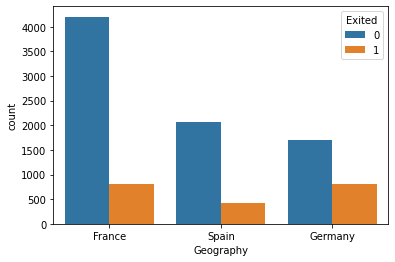

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()

**Insight 1:**
Dari grafik diatas dapat dilihat bahwa customer yang berada di negara france yang paling banyak tidak meninggalkan bank (churn). Perbandingan antara customer yang churn dan tidak di negara Germany paling kecil.

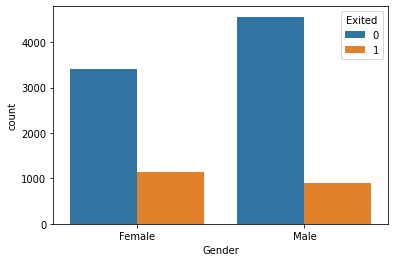

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.show()

**Insight 2:**
Dari grafik diatas dapat dilihat bahwa customer dengan gender pria paling banyak tidak meninggalkan bank sedangkan customer dengan gender wanita paling banyak yang churn.

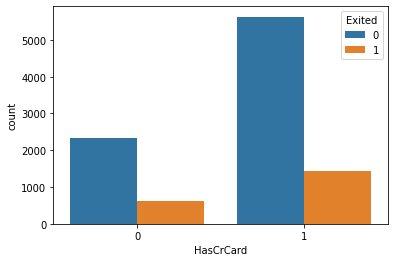

In [ ]:
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.show()

**Insight 3:**
Dari grafik diatas dapat dilihat bahwa customer yang memiliki credit card yang paling banyak tidak meninggalkan bank, namun paling banyak juga yang churn jika dibandingkan dengan customer yang tidak memiliki credit card.

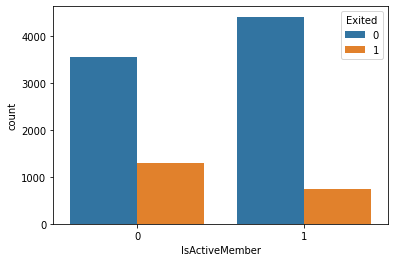

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.show()

**Insight 4:**
Dari grafik diatas dapat dilihat bahwa customer yang tidak aktif memiliki peluang untuk churn paling besar.

#### Numerical Features

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


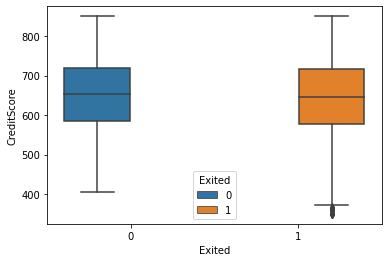

In [ ]:
sns.boxplot(y = "CreditScore", x = 'Exited', hue = "Exited", data=df)
plt.show()

Dari grafik boxplot diatas dapat dilihat bahwa untuk Credit Score memiliki distribusi yang sama, dimana pelanggan yang churn kebanyakan adalah pelanggan **yang memiliki Credit Score kecil**

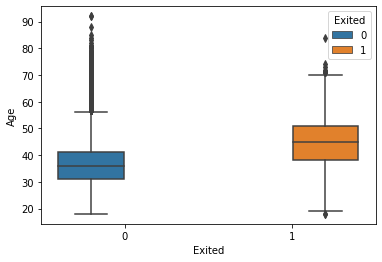

In [ ]:
sns.boxplot(y = "Age", x = 'Exited', hue = "Exited", data=df)
plt.show()

**Insight 5:**
Dari grafik diatas dapat disimpulkan bahwa usia antara 40 sampai 50 yang paling banyak churning, sementara usia antara 30 sampai 40an yang paling banyak tidak churn.

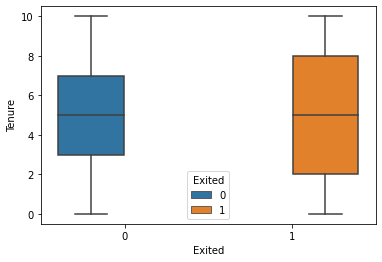

In [ ]:
sns.boxplot(y = "Tenure", x = 'Exited', hue = "Exited", data=df)
plt.show()

**Insight 6:**
Dari grafik diatas dapat disimpulkan bahwa distribusi pelanggan yang churn ada diantara customer yang berlangganan selama 2 sampai 8 tahun. 

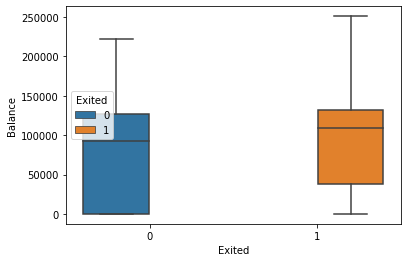

In [ ]:
sns.boxplot(y = "Balance", x = 'Exited', hue = "Exited", data=df)
plt.show()

**Insight 7:**
Dari grafik diatas dapat disimpulkan bahwa customer yang churn memiliki balance antara 50000 sampai 150000. 

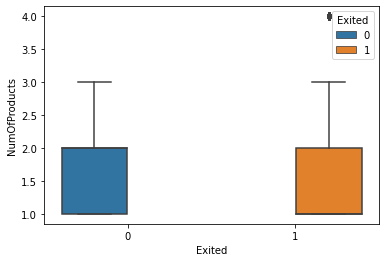

In [ ]:
sns.boxplot(y = "NumOfProducts", x = 'Exited', hue = "Exited", data=df)
plt.show()

**Insight 8:**
Dari grafik diatas dapat disimpulkan bahwa untuk number of product memiliki distribusi yang sama, dimana pelanggan yang churn kebanyakan memiliki 1 sampai 2 product.

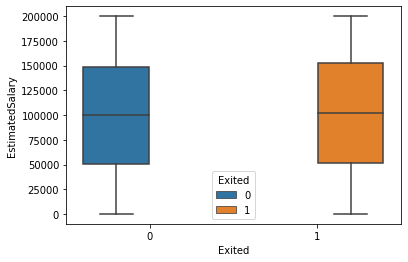

In [ ]:
sns.boxplot(y = "EstimatedSalary", x = 'Exited', hue = "Exited", data=df)
plt.show()

**Insight 9:**
Dari grafik diatas dapat disimpulkan bahwa untuk estimated salary memiliki distribusi yang sama, dimana pelanggan yang churn kebanyakan memiliki salary antara 50000 sampai 150000.

### Korelasi

In [ ]:
korelasi = df.corr()
korelasi

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


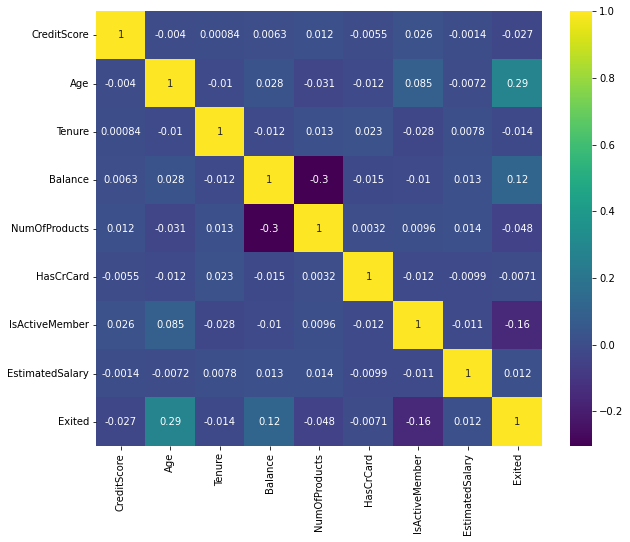

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(korelasi, annot=True, cmap="viridis")
plt.show()

**Insight 10:**
Heatmap Korelasi diatas menunjukkan bahwa customer yang churn sangat dipengaruhi oleh feature Age, Balance, dan IsActiveMember.

### Target Distribution

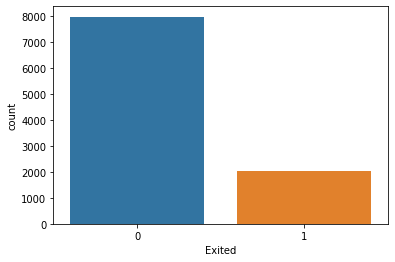

In [ ]:
sns.countplot(x="Exited", data=df)
plt.show()

In [ ]:
df['Exited'].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

Dari grafik diatas dapat disimpulkan bahwa pelanggan yang melakukan Churn sebanyak 20,37% dan sisanya adalah pelanggan yang tidak churn

## Feature Engineering

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Hubungan pelanggan dengan credit score, panjang pendek tenure, dan rasio balance saldo.

In [ ]:
df['CreditScoreGivenAge'] = df['CreditScore'] / df['Age']
df['TenureByAge'] = df['Tenure'] / df['Age']
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055


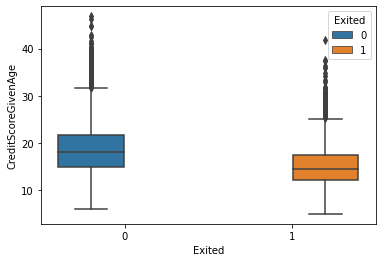

In [ ]:
sns.boxplot(y="CreditScoreGivenAge", x="Exited", hue="Exited", data = df)
plt.show()

Dari grafik diatas dapat dilihat bahwa orang yang memiliki "CreditScoreGivenAge" kecil adalah pelanggan yang melakukan churn. Artinya antara usia yang sudah tua atau credit score kecil, yang bisa jadi dikarenakan kuangnya promosi di usia yang lebih tua sehingga potensi churn lebih tinggi.

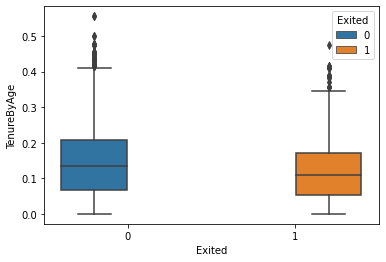

In [ ]:
sns.boxplot(y="TenureByAge", x="Exited", hue="Exited", data = df)
plt.show()

**Insight 11:**
Dari grafik diatas dapat dilihat bahwa orang yang memiliki "TenureByAge" kecil adalah pelanggan yang melakukan churn. Artinya antara usia yang sudah tua dengan tenure yang sebentar memiliki peluang besar untuk churn.

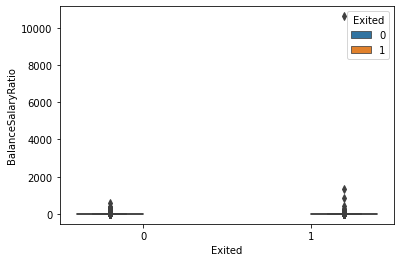

In [ ]:
sns.boxplot(y="BalanceSalaryRatio", x="Exited", hue="Exited", data = df)
plt.show()

**Insight 12:**
Dari grafik diatas dapat dilihat bahwa customer yang churn dan tidak berdasarkan "BalanceSalaryRatio" memiliki distribusi yang sama. Rata-rata pelanggan yang churn memiliki salary dan balance yang sama. 

## Data Preparation

In [ ]:
df_prep = df.copy()

In [ ]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_prep[string_feat])
datasetChurn_OHE = pd.DataFrame(ohe.transform(df_prep[string_feat]).toarray(),
                                              columns=ohe.get_feature_names_out())
df_prep = pd.concat([df_prep, datasetChurn_OHE], axis = 1)
df_prep = df_prep.drop(columns=string_feat)
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_prep)
df_prep = pd.DataFrame(mm.transform(df_prep), columns=df_prep.columns)
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.235083,0.085714,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.237252,0.043902,0.000070,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.168807,0.342857,0.000132,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.310859,0.046154,0.000000,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.354739,0.083721,0.000150,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X = df_prep.drop(columns=["Exited"]).copy()
y = df_prep["Exited"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7500, 16)
(2500, 16)


## Modelling

### Fitting

In [ ]:
# Logistic Regression, SVC, Random Forest, dll
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation

- Accuracy: seberapa akurat prediksi model
- Precision: seberapa baik prediksi label positif dari model
- Recall: seberapa baik kualitas model dalam memprediksi data yang positif
- F1-Score: harmonic mean (representatif) dari Precision Recall
- ROC-AUC: seberapa yakin model dalam prediksinya


Note: kelas positif -> customer churn

Binary Classification

- Kelas 1
- Kelas 0


Memprediksi Probabilitas

- Data A -> probabilitas untuk menjadi kelas 1 = 90%
- Data B -> probabilitas untuk menjadi kelas 1 = 30%

Threshold
- Probabilitas menjadi kelas 1 diatas 50%, labelnya 1
- Probabilitas menjadi kelas 1 dibawah 50%, labelnya 0

Prediksi Label
- Data A -> Kelas 1
- Data B -> Kelas 0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Logistic Regression")
y_pred = log.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))

y_pred_proba = log.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Logistic Regression
Accuracy: 0.81
Precision: 0.58
Recall: 0.21
F1-Score: 0.31
ROC AUC: 0.78


In [ ]:
print("SVM")
y_pred = svc.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))

y_pred_proba = log.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

SVM
Accuracy: 0.84
Precision: 0.81
Recall: 0.23
F1-Score: 0.35
ROC AUC: 0.78


In [ ]:
print("Random Forest")
y_pred = rf.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))

y_pred_proba = log.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Random Forest
Accuracy: 0.87
Precision: 0.78
Recall: 0.45
F1-Score: 0.58
ROC AUC: 0.78


### Resampling

In [ ]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)
print(y_smote.value_counts())

1.0    5960
0.0    5960
Name: Exited, dtype: int64


In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
print("Random Forest (SMOTE)")
y_pred = rf_smote.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_pred)))

y_pred_proba = rf_smote.predict_proba(X_test)[::,-1]
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))

Random Forest (SMOTE)
Accuracy: 0.84
Precision: 0.59
Recall: 0.60
F1-Score: 0.60
ROC AUC: 0.86


# Evaluasi Overfitting

In [ ]:
values = [i for i in range(1,21)]
train_scores = []
test_scores = []

In [ ]:
for i in values:
  model = RandomForestClassifier()
  model.fit(X_train,y_train)
  train_yhat=model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)

  test_yhat=model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)

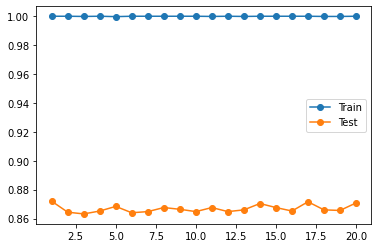

In [ ]:
plt.plot(values, train_scores, '-o', label = "Train")
plt.plot(values, test_scores, '-o', label = "Test")
plt.legend()
plt.show()

## Feature Importance

In [ ]:
df_fi = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), columns = ["Features", "Importance"])
df_fi.sort_values(by="Importance", ascending=False)

,Features,Importance
1,Age,0.156307
8,CreditScoreGivenAge,0.133271
4,NumOfProducts,0.122492
0,CreditScore,0.095893
3,Balance,0.090259
7,EstimatedSalary,0.089137
9,TenureByAge,0.080642
10,BalanceSalaryRatio,0.073813
2,Tenure,0.045790
6,IsActiveMember,0.038454


In [ ]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[::, -1]
X_result = df.iloc[X_test.index,:].copy()
X_result['ProbExited'] = y_pred_prob
X_result['PredictExited'] = y_pred

In [ ]:
X_result[(X_result["PredictExited"] == 1) & (X_result["ProbExited"] >= 0.95)].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,ProbExited,PredictExited
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.0
mean,635.428571,54.142857,4.285714,113534.292857,2.571429,0.714286,0.142857,79256.747143,1.0,11.868946,0.082354,3.722503,0.958571,1.0
std,123.098683,4.845223,3.498299,10092.499185,1.133893,0.487950,0.377964,54674.564623,0.0,2.840884,0.075062,4.575914,0.008997,0.0
min,484.000000,45.000000,0.000000,104568.410000,1.000000,0.000000,0.000000,8059.440000,1.0,8.962963,0.000000,0.800724,0.950000,1.0
25%,546.500000,52.500000,2.500000,107453.770000,2.000000,0.500000,0.000000,33438.535000,1.0,9.679624,0.042811,0.891969,0.950000,1.0
50%,630.000000,55.000000,3.000000,111362.760000,3.000000,1.000000,0.000000,88372.690000,1.0,11.220339,0.055556,1.227180,0.960000,1.0
75%,703.500000,57.500000,6.000000,114756.615000,3.000000,1.000000,0.000000,125631.445000,1.0,13.492260,0.106539,4.635516,0.965000,1.0
max,834.000000,59.000000,10.000000,134388.110000,4.000000,1.000000,1.000000,140225.140000,1.0,16.555556,0.222222,12.974650,0.970000,1.0


**Insight 14:**
Data pelanggan diatas yang akan melakukan churn dan probabilitas akan churn adalah sebesar 95 persen.

Data diatas dapat memberikan prediksi kepada user mengenai apakah customer  akan churn atau tidak berdasarkan feature-feature yang ada pada dataset yang telah dilatih.